In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Input, Add, Activation,ZeroPadding2D, BatchNormalization, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import glorot_uniform
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
from keras.models import Model, load_model

In [3]:
train_df=pd.read_csv('../input/train.csv')

In [4]:
y=train_df['label']

In [5]:
y=to_categorical(y, num_classes=10)


In [6]:
X= train_df.drop(labels = ["label"],axis = 1) 

In [7]:
test=pd.read_csv('../input/test.csv')

In [8]:
#Normalizing
X=X/255.
test=test/255.

In [9]:
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
model=Sequential()

model.add(Conv2D(32, (5, 5), strides = (2, 2),padding='same', name = 'conv1', kernel_initializer = glorot_uniform(seed=0), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (5, 5), strides = (2, 2),padding='same', name = 'conv2', kernel_initializer = glorot_uniform(seed=0), activation="relu"))
model.add(BatchNormalization(axis=3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), strides = (2, 2),padding='same', name = 'conv3', kernel_initializer = glorot_uniform(seed=0), activation="relu"))
model.add(BatchNormalization(axis=3))
#model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))


model.add(AveragePooling2D(pool_size=(1, 1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax', kernel_initializer = glorot_uniform(seed=0)))

In [12]:
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Data Augmentation

In [13]:
epochs = 40
batch_size = 86

In [14]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train, batch_size=batch_size)
test_gen = datagen.flow(X_test, y_test, batch_size=batch_size)

In [15]:
#model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

model.fit_generator(train_gen,
                    epochs = epochs,
                    steps_per_epoch = X_train.shape[0] // batch_size,
                    validation_data = test_gen,
                    validation_steps = X_test.shape[0] // batch_size)

Epoch 1/40
390/390 [==============================] - 18s 47ms/step - loss: 1.3546 - acc: 0.5725 - val_loss: 0.5499 - val_acc: 0.8251
Epoch 2/40
390/390 [==============================] - 17s 43ms/step - loss: 0.5092 - acc: 0.8403 - val_loss: 0.2656 - val_acc: 0.9221
Epoch 3/40
390/390 [==============================] - 17s 44ms/step - loss: 0.3550 - acc: 0.8912 - val_loss: 0.2482 - val_acc: 0.9245
Epoch 4/40
390/390 [==============================] - 17s 43ms/step - loss: 0.2803 - acc: 0.9138 - val_loss: 0.1578 - val_acc: 0.9515
Epoch 5/40
390/390 [==============================] - 17s 43ms/step - loss: 0.2441 - acc: 0.9258 - val_loss: 0.1304 - val_acc: 0.9592
Epoch 6/40
390/390 [==============================] - 17s 43ms/step - loss: 0.2226 - acc: 0.9325 - val_loss: 0.1154 - val_acc: 0.9650
Epoch 7/40
390/390 [==============================] - 17s 43ms/step - loss: 0.2063 - acc: 0.9380 - val_loss: 0.1070 - val_acc: 0.9663
Epoch 8/40
390/390 [==============================] - 17s 44ms

In [16]:
import matplotlib.pyplot as plt

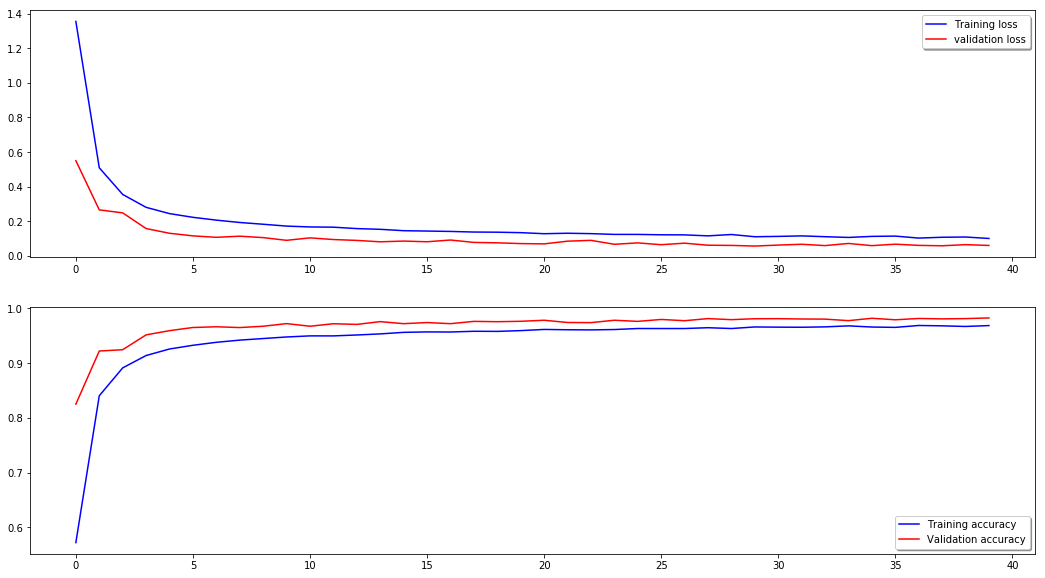

In [17]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1, figsize=(18, 10))
ax[0].plot(model.history.history['loss'], color='b', label="Training loss")
ax[0].plot(model.history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model.history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(model.history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [18]:
# predict results
results = model.predict(test)

# # select the indix with the maximum probability
# results = np.argmax(results,axis = 1)

# results = pd.Series(results,name="Label")

In [19]:
results = np.argmax(results,axis = 1)

In [20]:
results = pd.Series(results,name="Label")

In [21]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)